In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
from astropy.table import Table

In [4]:
def makeTable(effDict, effTable, effKeys):
    for filename in effDict:
        row = np.zeros(len(effKeys))
        for i,key in enumerate(effKeys):
            try:
                row[i] = effDict[filename][key] 
            except KeyError:
                row[i] = 0.
        effTable.add_row(row)
    return effTable

In [5]:
def plotStuff(OldTable, NewTable, key, title):
    for angle in set(OldTable['Cos']):
        maskOld = OldTable['Cos'] == angle
        maskNew = NewTable['Cos'] == angle
        plt.plot(NewTable[maskNew]['MeV'],
                 NewTable[maskNew][key]/100000.,
                's', label = 'new', alpha=0.5)
        plt.plot(OldTable[maskOld]['MeV'],
                 OldTable[maskOld][key]/100000.,
                 '.', label = 'old')
        plt.title('Cos{:0.1f}'.format(angle))
        plt.xscale('log')
        plt.xlabel('Energy [MeV]')
        plt.ylabel(key)
        plt.legend()
        plt.show()

In [6]:
cosimaKeys = ('Cos','MeV','numberOfSimulatedEvents', 'numberOfTriggers')
cosimaTypes = ('f4','f4','i4','i4')

In [7]:
revanKeys = ('Cos',
             'MeV',
             'MainTrigger',
             'MainVetoSide',
             'Not triggered events',
             'Number of triggered events',
             'Number of vetoed events',
             'MainVetoTop')
revanTypes = ('f4', "f4",'i4', 'i4', 'i4', 'i4', 'i4', 'i4')

In [11]:
SimPath = "/data/slag2/ComPair/Simulations/"
OldPath = SimPath + "MultiCoreTestSimFiles/"
NewPath = SimPath + "PerformancePlotSimFiles_20160926/"

In [13]:
NewPath

'/data/slag2/ComPair/Simulations/PerformancePlotSimFiles_20160926/'

In [14]:
revanEffNew = pickle.load(open( NewPath + "revanEff.p", "rb" ))
cosimaEffNew = pickle.load(open( NewPath + "cosimaEff.p", "rb"))
revanEffOld = pickle.load(open( OldPath + "revanEff.p", "rb" ))
cosimaEffOld = pickle.load(open( OldPath + "cosimaEff.p", "rb"))

In [15]:
cosimaTableNew = Table(names=cosimaKeys, dtype=cosimaTypes)
cosimaTableOld = Table(names=cosimaKeys, dtype=cosimaTypes)

In [16]:
revanTableNew = Table(names=revanKeys, dtype=revanTypes)
revanTableOld = Table(names=revanKeys, dtype=revanTypes)

In [17]:
revanTableNew = makeTable(revanEffNew,revanTableNew,revanKeys)

In [18]:
revanTableOld = makeTable(revanEffOld,revanTableOld,revanKeys)

In [19]:
cosimaTableNew = makeTable(cosimaEffNew,cosimaTableNew,cosimaKeys)
cosimaTableOld = makeTable(cosimaEffOld,cosimaTableOld,cosimaKeys)

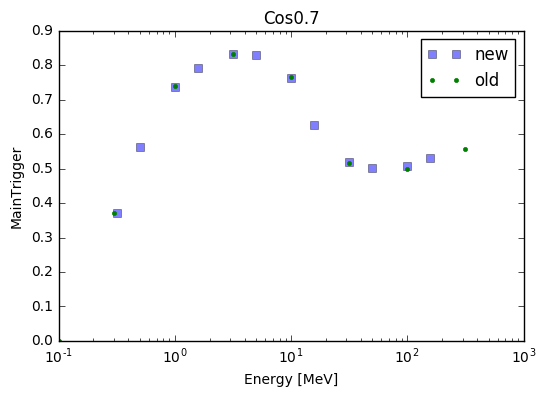

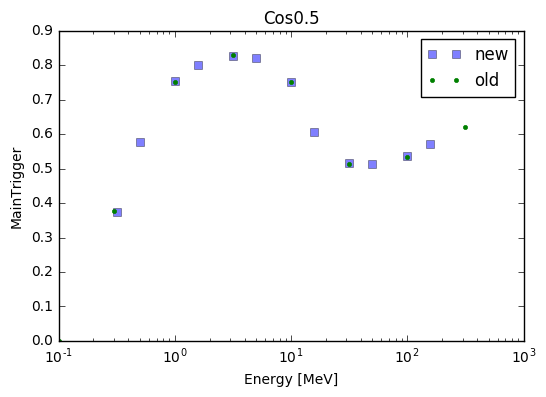

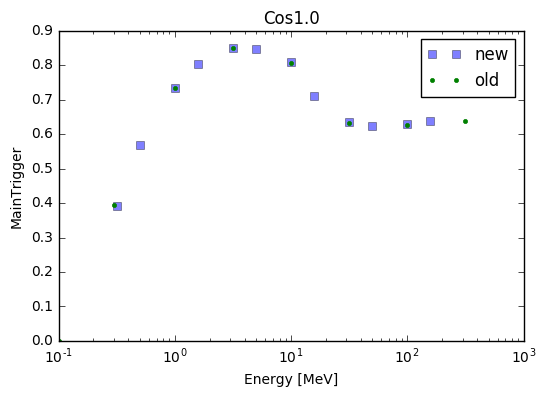

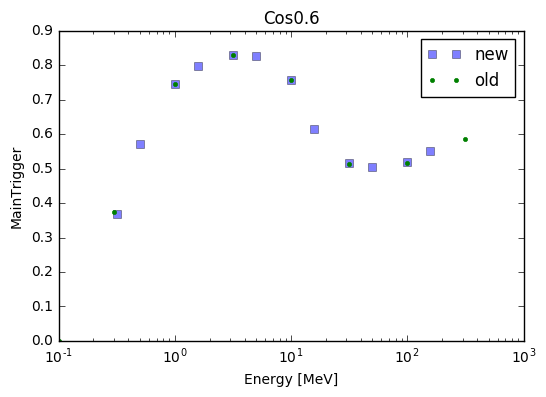

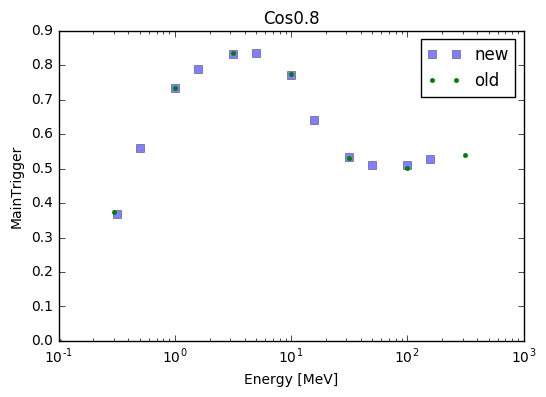

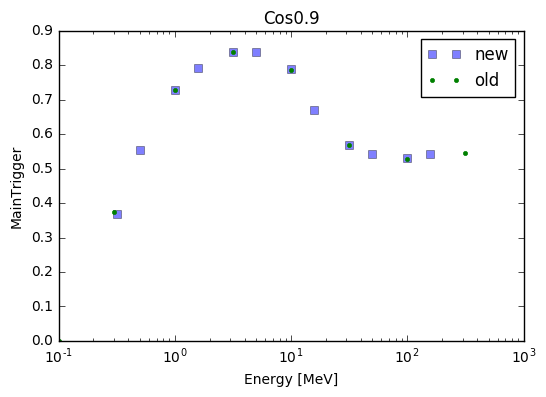

In [20]:
plotStuff(revanTableOld,revanTableNew,'MainTrigger','Revan Main Trigger [%]')

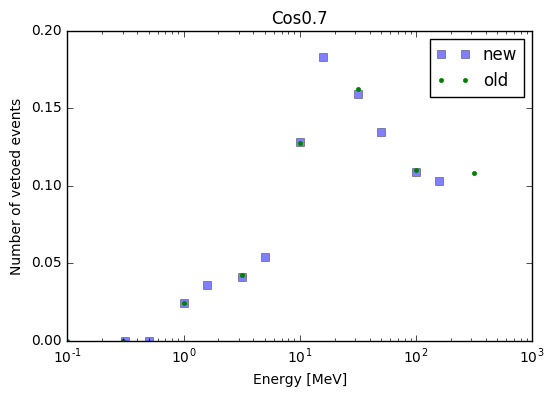

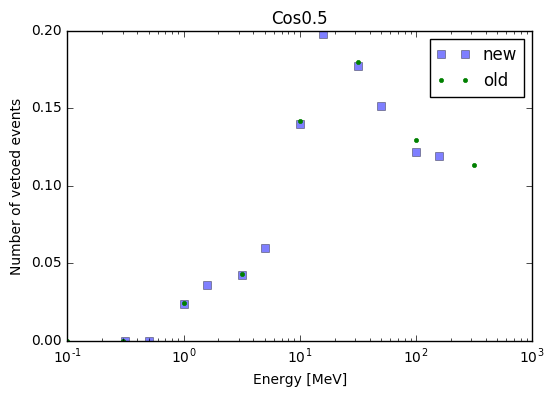

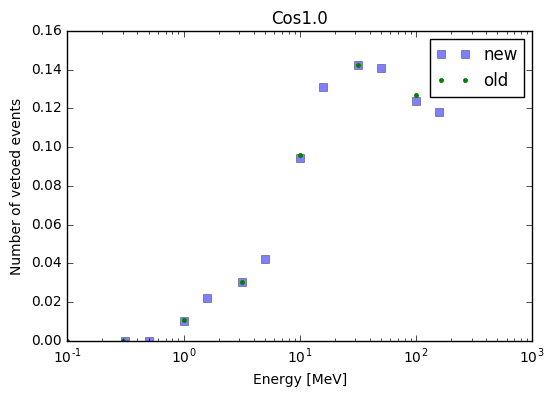

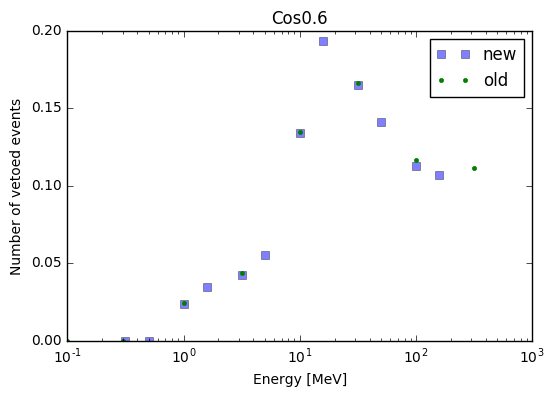

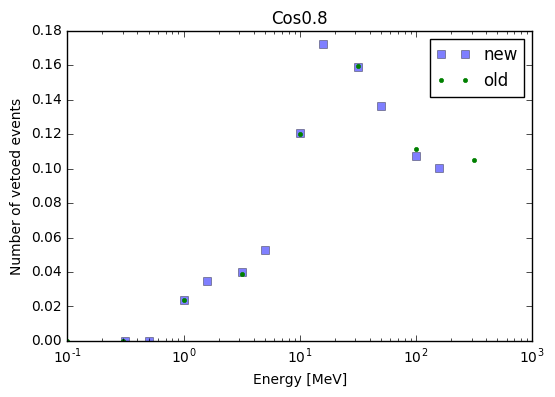

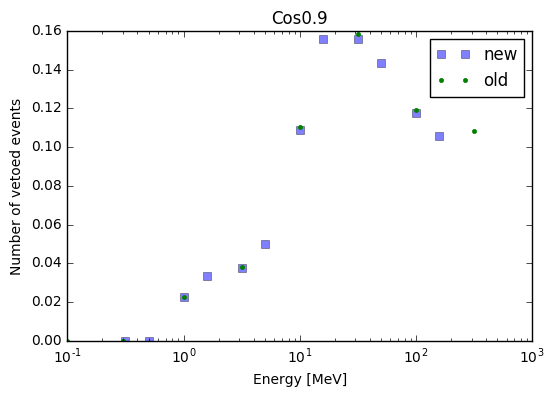

In [21]:
plotStuff(revanTableOld,revanTableNew,'Number of vetoed events','Number of vetoed events [%]')

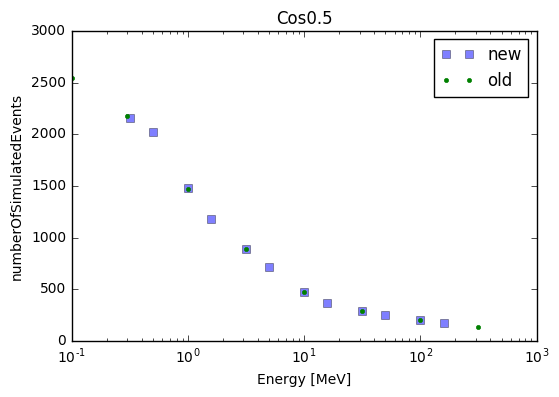

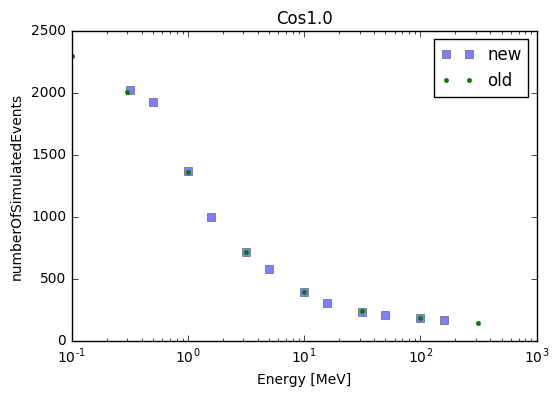

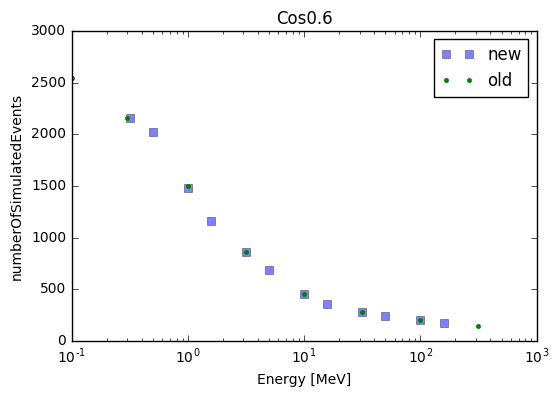

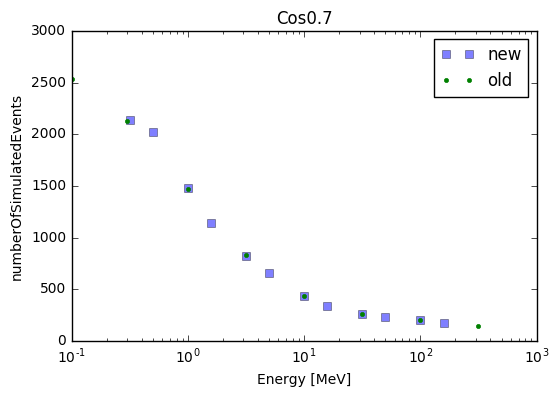

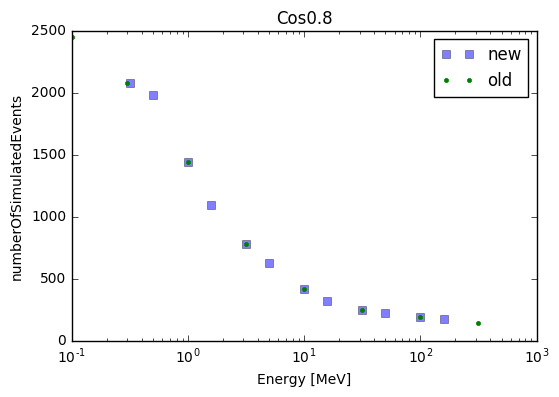

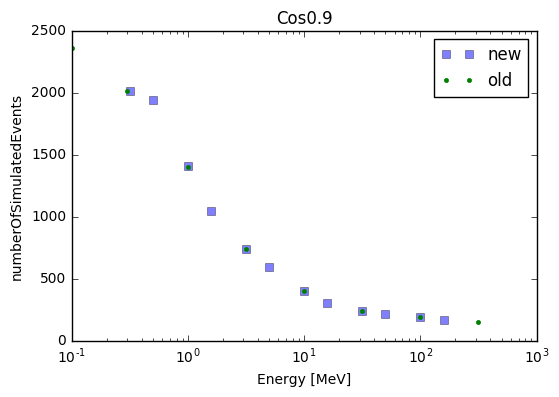

In [22]:
plotStuff(cosimaTableOld,cosimaTableNew,'numberOfSimulatedEvents','Cosima Simulated Events [%]')